# Weeks 5 & 6 Exercises

## Data Wrangling with Python Activities

### Activity 7

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
from matplotlib import pyplot as plt

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
website = requests.get(url).text
soup = BeautifulSoup(website, 'html')

In [4]:
# find all wikitables
tables = soup.find('table', class_="wikitable")

In [5]:
# what type are tables
print(type(tables))

<class 'bs4.element.Tag'>


In [6]:
# how many tables
print(len(tables))

4


In [7]:
# create data frame of all 3 sources
df = pd.read_html(str(tables))
dft = df[0]
dft

Country/Territory UN Region IMF[1][13]            United Nations[14]  \
    Country/Territory UN Region   Estimate       Year           Estimate   
0               World         —   93863851       2021           87461674   
1       United States  Americas   25346805       2022           20893746   
2               China      Asia   19911593  [n 2]2022           14722801   
3               Japan      Asia    4912147       2022            5057759   
4             Germany    Europe    4256540       2022            3846414   
..                ...       ...        ...        ...                ...   
212             Palau   Oceania        244       2022                264   
213          Kiribati   Oceania        216       2022                181   
214             Nauru   Oceania        134       2022                135   
215        Montserrat  Americas          —          —                 68   
216            Tuvalu   Oceania         66       2022                 55   

               World Bank[15]        
          Year       Estimate  Year  
0         2020       96100091  2021  
1         2020       22996100  2021  
2    [n 3]2020       17734063  2021  
3         2020        4937422  2021  
4         2020        4223116  2021  
..         ...            ...   ...  
212       2020            258  2020  
213       2020            181  2020  
214       2020            133  2021  
215       2020              —     —  
216       2020             63  2021  

[217 rows x 8 columns]

In [8]:
# split sources into just IMF
imf = dft[['Country/Territory', "UN Region", "IMF[1][13]"]]
imf

Country/Territory UN Region IMF[1][13]           
    Country/Territory UN Region   Estimate       Year
0               World         —   93863851       2021
1       United States  Americas   25346805       2022
2               China      Asia   19911593  [n 2]2022
3               Japan      Asia    4912147       2022
4             Germany    Europe    4256540       2022
..                ...       ...        ...        ...
212             Palau   Oceania        244       2022
213          Kiribati   Oceania        216       2022
214             Nauru   Oceania        134       2022
215        Montserrat  Americas          —          —
216            Tuvalu   Oceania         66       2022

[217 rows x 4 columns]

In [9]:
# subset just UN
un = dft[['Country/Territory', "UN Region", "United Nations[14]"]]
un

Country/Territory UN Region United Nations[14]           
    Country/Territory UN Region           Estimate       Year
0               World         —           87461674       2020
1       United States  Americas           20893746       2020
2               China      Asia           14722801  [n 3]2020
3               Japan      Asia            5057759       2020
4             Germany    Europe            3846414       2020
..                ...       ...                ...        ...
212             Palau   Oceania                264       2020
213          Kiribati   Oceania                181       2020
214             Nauru   Oceania                135       2020
215        Montserrat  Americas                 68       2020
216            Tuvalu   Oceania                 55       2020

[217 rows x 4 columns]

In [10]:
# subset just World Bank
wb = dft[['Country/Territory', "UN Region", "World Bank[15]"]]
wb

Country/Territory UN Region World Bank[15]      
    Country/Territory UN Region       Estimate  Year
0               World         —       96100091  2021
1       United States  Americas       22996100  2021
2               China      Asia       17734063  2021
3               Japan      Asia        4937422  2021
4             Germany    Europe        4223116  2021
..                ...       ...            ...   ...
212             Palau   Oceania            258  2020
213          Kiribati   Oceania            181  2020
214             Nauru   Oceania            133  2021
215        Montserrat  Americas              —     —
216            Tuvalu   Oceania             63  2021

[217 rows x 4 columns]

### Activity 8

In [11]:
# loading data
visit = pd.read_csv("visit_data.csv")

In [12]:
# dropping duplicates
print(f"Duplicates in First Names: {any(visit.first_name.duplicated())}\n"
      f"Duplicates in Last Names: {any(visit.last_name.duplicated())}\n"
      f"Duplicates in email: {any(visit.email.duplicated())}\n")

Duplicates in First Names: True
Duplicates in Last Names: True
Duplicates in email: False



In [13]:
# look for nan's in important columns
print(f"Nan's in email: {any(visit.email.isnull().values)}\n"
      f"Nan's in IP Address: {any(visit.ip_address.isnull().values)}\n"
      f"Nan's in Visit: {any(visit.visit.isnull().values)}\n")

Nan's in email: False
Nan's in IP Address: False
Nan's in Visit: True



In [14]:
# drop nans in visit
visit2 = visit.dropna(subset=['visit'])
visit2

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [15]:
# size difference
print(f"The difference in size between original and new data frame is {len(visit) - len(visit2)})")

The difference in size between original and new data frame is 26)


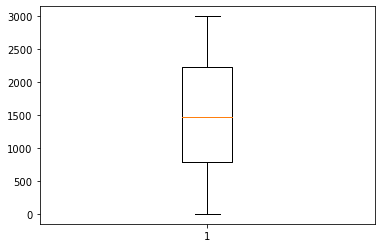

In [16]:
# find outliers
plt.boxplot(visit2.visit)
plt.show()

In [19]:
# get rid of extreme values
visit3 = visit2[(visit2["visit"]<=2900) & (visit2["visit"]>-100)]
visit3

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


## SQL Practice

In [20]:
import sqlite3

In [24]:
# some random data
data = [("Astra Edwards","Ap #122-4338 Id St.","Wyoming","WY","13906","(927) 337-2776"),
      ("Penelope Mann","251-5075 Vulputate Road","Lexington","NY","85890","(676) 772-7317"),
      ("Shoshana Rowe","748 Ac Ave","Cambridge","MA","74136","(666) 583-9386"),
      ("Drake Goff","Ap #842-2281 Arcu. Avenue","Stamford","CA","53189","(389) 331-7522"),
      ("TaShya Young","P.O. Box 393, 9917 Ut Road","Sterling Heights","WI","41709","(258) 494-5125"),
      ("Alice Boyd","Ap #729-4807 Magna. Avenue","Virginia Beach","VA", "25814","(731) 853-8783"),
      ("Tiger Webb","669-965 Dis St.","Lafayette","VA","89652","1-775-914-4627"),
      ("Kaye Heath","Ap #826-4099 Ligula. St.","Burlington","WV","72357","1-627-373-8361"),
      ("Hashim Forbes","Ap #880-5551 Nulla Rd.","Paradise","CA","63533","(402) 380-4201"),
      ("Allistair Cameron","Ap #725-7719 Lectus Street","Rock Springs","UT", "34758","1-925-835-9365")]


In [25]:
# create query
query = """
        CREATE TABLE contact
        (Name VARCHAR(255), Street Address VARCHAR(255),
        city VARCHAR(255), State VARCHAR(255), 
        zip VARCHAR(255), phone VARCHAR(100));
"""

In [28]:
# connect to database
con = sqlite3.connect("mydata.sqlite")

In [29]:
# create table
con.execute(query)

In [30]:
con.commit()

In [31]:
# general insert statement
stmt = "INSERT INTO contact VALUES(?, ?, ?, ?, ?, ?)"

In [32]:
# execute insert statement for all data
con.executemany(stmt, data)

In [40]:
con.commit()

In [41]:
# select cursor
cursor = con.execute("select * from contact")

In [42]:
# get all rows
rows = cursor.fetchall()

In [43]:
# print all rows
rows

[('Astra Edwards',
  'Ap #122-4338 Id St.',
  'Wyoming',
  'WY',
  '13906',
  '(927) 337-2776'),
 ('Penelope Mann',
  '251-5075 Vulputate Road',
  'Lexington',
  'NY',
  '85890',
  '(676) 772-7317'),
 ('Shoshana Rowe', '748 Ac Ave', 'Cambridge', 'MA', '74136', '(666) 583-9386'),
 ('Drake Goff',
  'Ap #842-2281 Arcu. Avenue',
  'Stamford',
  'CA',
  '53189',
  '(389) 331-7522'),
 ('TaShya Young',
  'P.O. Box 393, 9917 Ut Road',
  'Sterling Heights',
  'WI',
  '41709',
  '(258) 494-5125'),
 ('Alice Boyd',
  'Ap #729-4807 Magna. Avenue',
  'Virginia Beach',
  'VA',
  '25814',
  '(731) 853-8783'),
 ('Tiger Webb',
  '669-965 Dis St.',
  'Lafayette',
  'VA',
  '89652',
  '1-775-914-4627'),
 ('Kaye Heath',
  'Ap #826-4099 Ligula. St.',
  'Burlington',
  'WV',
  '72357',
  '1-627-373-8361'),
 ('Hashim Forbes',
  'Ap #880-5551 Nulla Rd.',
  'Paradise',
  'CA',
  '63533',
  '(402) 380-4201'),
 ('Allistair Cameron',
  'Ap #725-7719 Lectus Street',
  'Rock Springs',
  'UT',
  '34758',
  '1-925-835

In [45]:
# put into data frame BONUS!
contacts = pd.DataFrame(rows, columns=[x[0]for x in cursor.description])
contacts

,Name,Street,city,State,zip,phone
0,Astra Edwards,Ap #122-4338 Id St.,Wyoming,WY,13906,(927) 337-2776
1,Penelope Mann,251-5075 Vulputate Road,Lexington,NY,85890,(676) 772-7317
2,Shoshana Rowe,748 Ac Ave,Cambridge,MA,74136,(666) 583-9386
3,Drake Goff,Ap #842-2281 Arcu. Avenue,Stamford,CA,53189,(389) 331-7522
4,TaShya Young,"P.O. Box 393, 9917 Ut Road",Sterling Heights,WI,41709,(258) 494-5125
5,Alice Boyd,Ap #729-4807 Magna. Avenue,Virginia Beach,VA,25814,(731) 853-8783
6,Tiger Webb,669-965 Dis St.,Lafayette,VA,89652,1-775-914-4627
7,Kaye Heath,Ap #826-4099 Ligula. St.,Burlington,WV,72357,1-627-373-8361
8,Hashim Forbes,Ap #880-5551 Nulla Rd.,Paradise,CA,63533,(402) 380-4201
9,Allistair Cameron,Ap #725-7719 Lectus Street,Rock Springs,UT,34758,1-925-835-9365
